**Clustering**

Dataset: Olivetti faces

Tasks: cluster the images using K-Means and Gaussian Mixture Model (GMM) with dimensionality reduction
Hints: sklearn.datasets, sklearn.decomposition, fetch_olivetti_faces(), PCA()

This is a practice code for clustering. The K-means unsupervised machine learning model is used to train the Olivetti faces dataset to predict the image of each person represented in the dataset. This is an unsupervised stratification and clustering task that involves stratification sampling and dimensonality reduction using Principal Component Analysis (PCA) method in Scikit-Learn.

1. Loads Olivetti Faces dataset from sklearn.datasets.

2. Uses PCA to reduce dimensions (100 components).

3. Applies K-Means clustering (n_clusters=40).

4. Applies Gaussian Mixture Model (GMM) (n_components=40).

5. Evaluate clustering performance using Adjusted Rand Index.

6. Visualizes:

    Cluster centers from K-Means.

    Example faces with assigned cluster labels. Show examples from K-Means and GMM clusters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces

#Load the Olivetti Faces dataset
def load_data():
    data = fetch_olivetti_faces(shuffle=True, random_state=42)
    return data.images, data.data, data.target

data, X, y = load_data()

In [3]:
# Viewing the Olivetti dataset
data

array([[[0.1983471 , 0.23553719, 0.35123968, ..., 0.5041322 ,
         0.5289256 , 0.5289256 ],
        [0.19421488, 0.24380165, 0.36363637, ..., 0.5041322 ,
         0.5165289 , 0.5289256 ],
        [0.1983471 , 0.2520661 , 0.35950413, ..., 0.5123967 ,
         0.5123967 , 0.5247934 ],
        ...,
        [0.35950413, 0.57024795, 0.55785125, ..., 0.11570248,
         0.0785124 , 0.09917355],
        [0.55785125, 0.607438  , 0.5785124 , ..., 0.07438017,
         0.07438017, 0.12809917],
        [0.62396693, 0.59090906, 0.6280992 , ..., 0.06198347,
         0.12809917, 0.09090909]],

       [[0.18595041, 0.12809917, 0.11570248, ..., 0.1694215 ,
         0.18181819, 0.15289256],
        [0.18595041, 0.18595041, 0.11570248, ..., 0.15289256,
         0.1570248 , 0.1446281 ],
        [0.23553719, 0.17768595, 0.1446281 , ..., 0.11570248,
         0.16115703, 0.11157025],
        ...,
        [0.38842976, 0.38016528, 0.38429752, ..., 0.21487603,
         0.21487603, 0.20661157],
        [0.3

In [4]:
#Plot face images with their cluster labels
def plot_faces(images, titles, h=64, w=64, rows=3, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.ravel()
    for i in range(rows * cols):
        if i < len(images):
            axes[i].imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
            axes[i].set_title(f"Cluster {titles[i]}")
            axes[i].axis('off')
    plt.show()

In [6]:
#Reduce dimensionality using PCA
from sklearn.decomposition import PCA
def apply_pca(data, n_components=100):
    pca = PCA(n_components=n_components, whiten=True, random_state=42)
    reduced_data = pca.fit_transform(data)
    return reduced_data, pca

In [5]:
#Apply K-Means clustering
from sklearn.cluster import KMeans
def kmeans_clustering(data, n_clusters=40):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

In [7]:
#Apply GMM clustering
from sklearn.mixture import GaussianMixture
def gmm_clustering(data, n_clusters=40):

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels, gmm

In [8]:
#Evaluate clustering performance using Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
def evaluate_clustering(labels_true, labels_pred):
    return adjusted_rand_score(labels_true, labels_pred)

In [9]:
# Load dataset
images, data, labels_true = load_data()

In [10]:
# Apply PCA
reduced_data, pca = apply_pca(data, n_components=100)

In [11]:
# Apply K-Means clustering
labels_kmeans, kmeans = kmeans_clustering(reduced_data)

In [12]:
 # Apply GMM clustering
labels_gmm, gmm = gmm_clustering(reduced_data)

In [13]:
# Evaluate clustering
ari_kmeans = evaluate_clustering(labels_true, labels_kmeans)
ari_gmm = evaluate_clustering(labels_true, labels_gmm)

In [14]:
print(f"Adjusted Rand Index (K-Means): {ari_kmeans:.4f}")
print(f"Adjusted Rand Index (GMM): {ari_gmm:.4f}")

Adjusted Rand Index (K-Means): 0.2414
Adjusted Rand Index (GMM): 0.1663


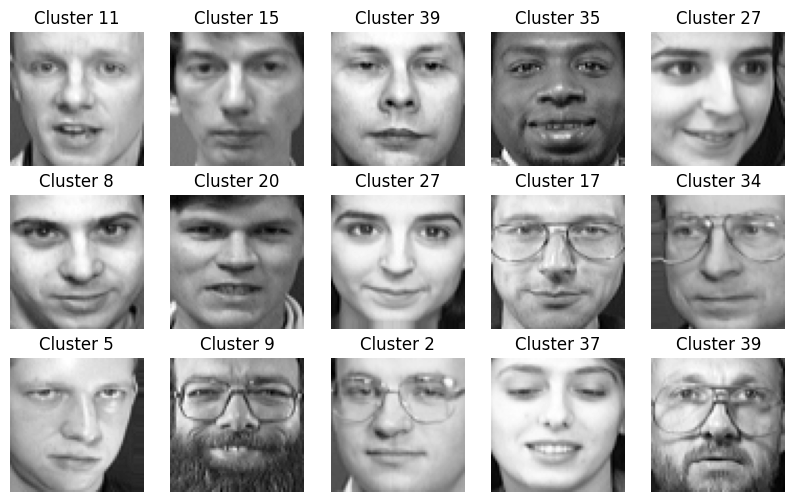

In [15]:
# Plot sample faces with cluster labels
plot_faces(images[:15], labels_kmeans[:15])

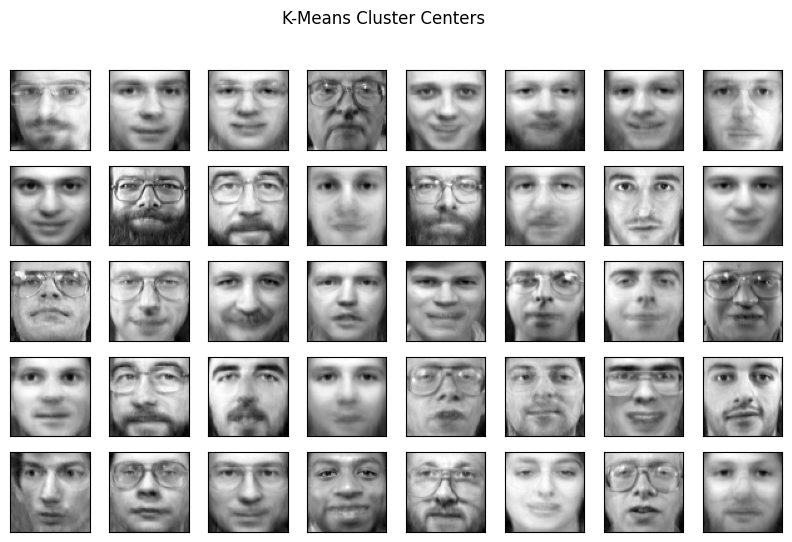

In [16]:
# Visualize cluster centers
def plot_cluster_centers(model, title):
    fig, axes = plt.subplots(5, 8, figsize=(10, 6),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for ax, component in zip(axes.flat, model.cluster_centers_):
        ax.imshow(pca.inverse_transform(component).reshape(64, 64), cmap='gray')
    plt.suptitle(title)
    plt.show()

# Display K-Means cluster centers
plot_cluster_centers(kmeans, "K-Means Cluster Centers")

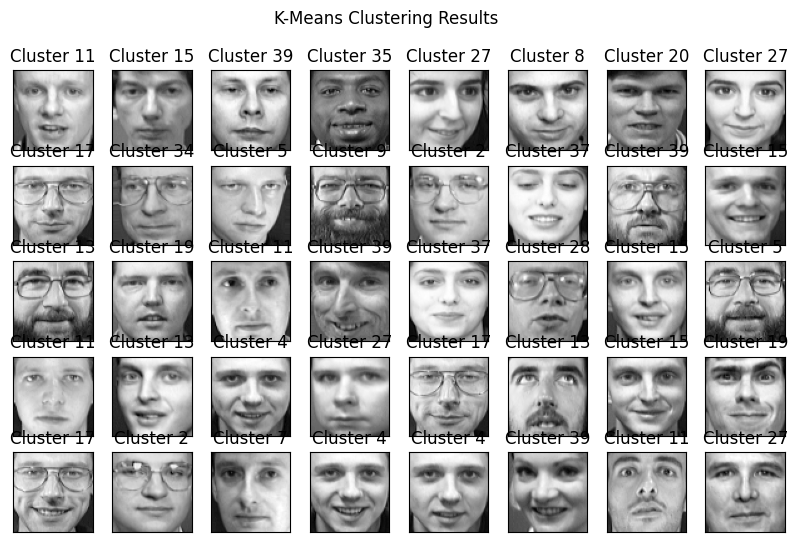

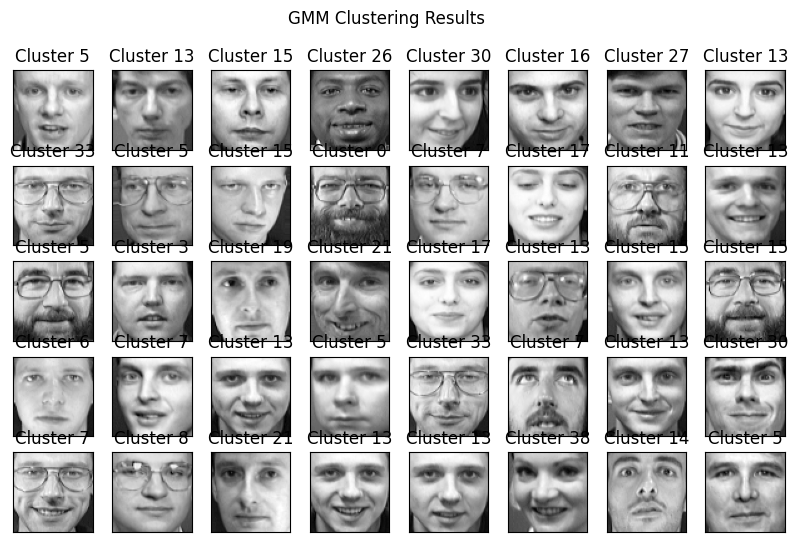

In [17]:
# Display some example faces from clusters
def plot_cluster_examples(X, labels, title):
    fig, axes = plt.subplots(5, 8, figsize=(10, 6),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for ax, img, lbl in zip(axes.flat, X, labels):
        ax.imshow(img.reshape(64, 64), cmap='gray')
        ax.set_title(f"Cluster {lbl}")
    plt.suptitle(title)
    plt.show()

# Show examples from K-Means and GMM clusters
plot_cluster_examples(X, labels_kmeans, "K-Means Clustering Results")
plot_cluster_examples(X, labels_gmm, "GMM Clustering Results")